# Behavior of the median filter: Spike trains with different distance between spikes

# DW (2015.11.30)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from scipy.signal import medfilt, triang
import gitInformation

In [2]:
%matplotlib inline 

In [3]:
gitInformation.printInformation()

Information about this notebook
Date: 2015-12-01
Python Version: 2.7.10 |Anaconda 2.4.0 (32-bit)| (default, Oct 28 2015, 14:01:20) [MSC v.1500 32 bit (Intel)]
Git directory: C:\Users\Dominik\Documents\GitRep\kt-2015-DSPHandsOn\.git
Current git SHA: 80acc6b1248e14ab92ca91c67077ac735a992277
Remotes: fork, origin, 
Current branch: master
fork remote URL: http://github.com/dowa4213/kt-2015-DSPHandsOn.git
origin remote URL: https://github.com/ktakagaki/kt-2015-DSPHandsOn.git


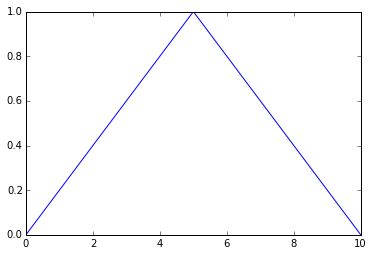

In [4]:
tri = np.array([0, 1, 2, 3, 4, 5, 4, 3, 2, 1,0])
tri2 = np.array([1, 2, 3, 4, 5, 4, 3, 2, 1, 0])
tri = tri/5.
tri2 = tri2/5.
plt.plot(tri)

## Generate 3 spike trains with different distance between the spikes

In [75]:
data1 = np.append(tri,tri2)
for i in range (10):
    data1 = np.append(data1,tri2)

In [76]:
x = np.zeros(5)
data2 = np.append(tri,x)
for i in range (10):
    data2 = np.append(data2,tri2)
    data2 = np.append(data2,x)

In [77]:
x = np.zeros(10)
data3 = np.append(tri,x)
for i in range (10):
    data3 = np.append(data3,tri2)
    data3 = np.append(data3,x)

## Plot spike trains

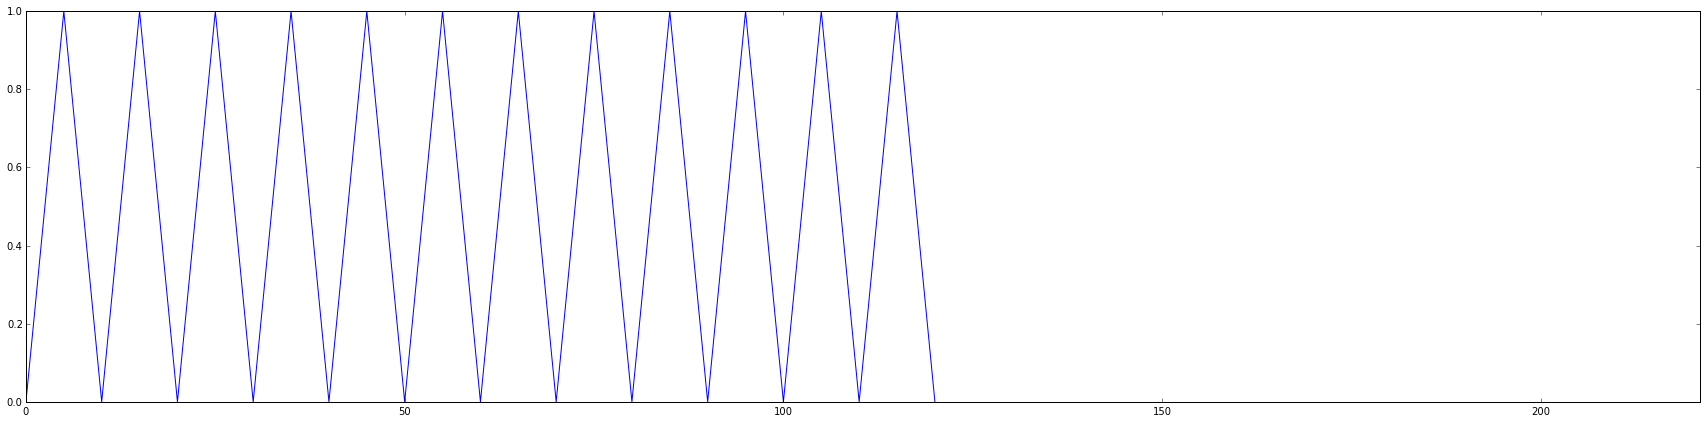

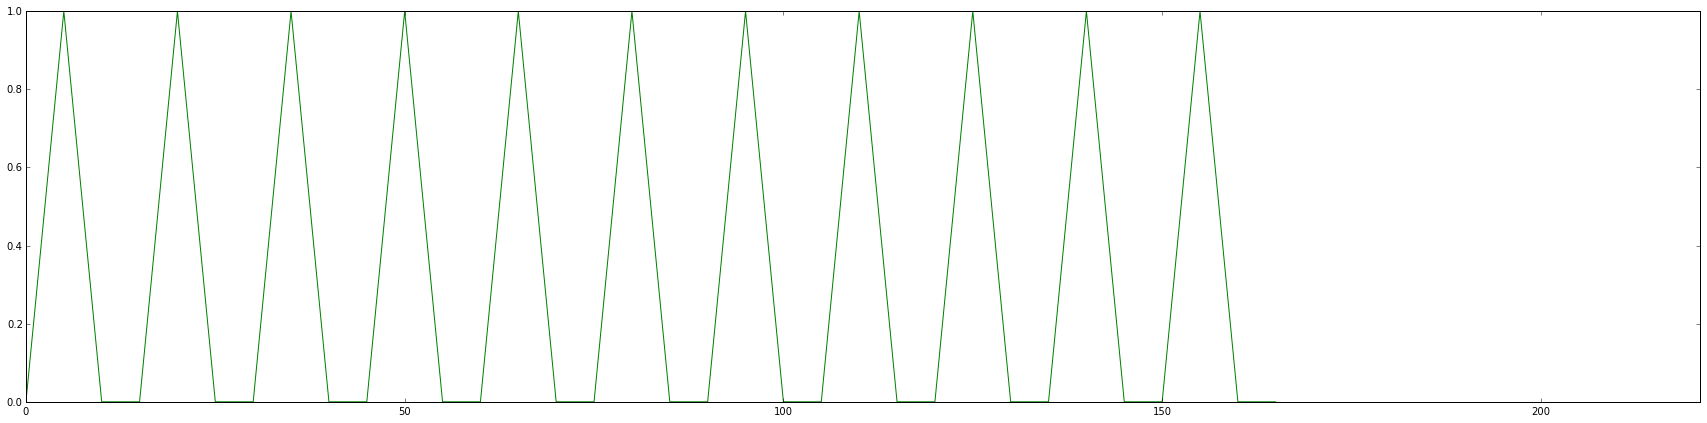

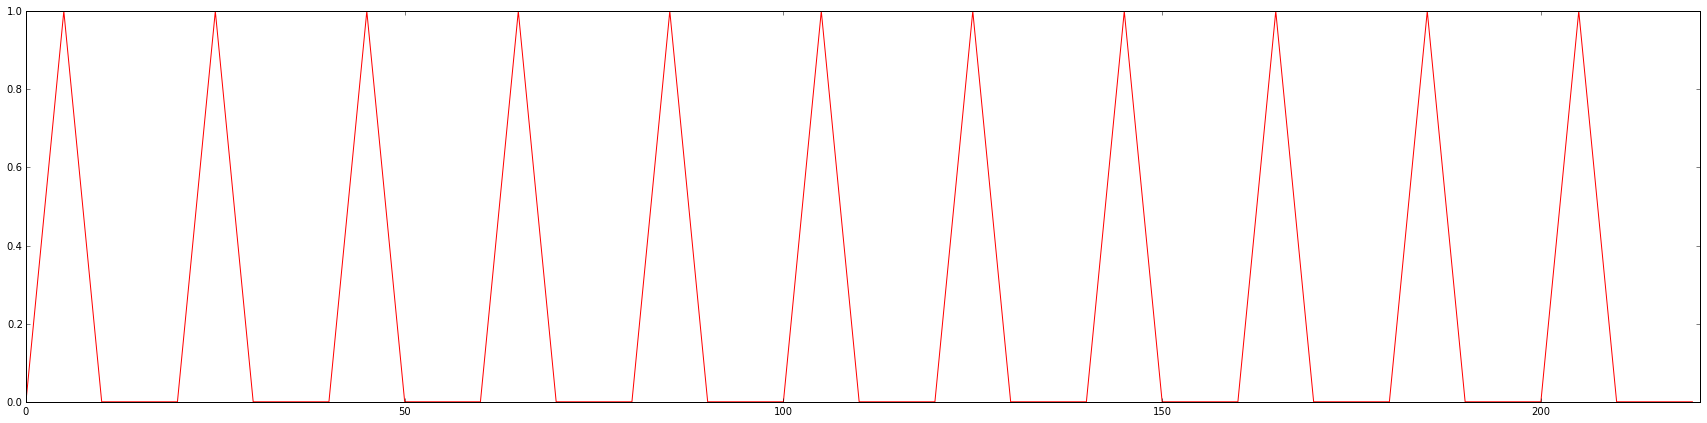

In [79]:
plt.figure(1, figsize=(30,7))
plt.axis([0, 221, 0, 1])
plt.plot(data1, color = 'b')
plt.figure(2, figsize=(30,7))
plt.axis([0, 221, 0, 1])
plt.plot(data2, color = 'g')
plt.figure(3, figsize=(30,7))
plt.axis([0, 221, 0, 1])
plt.plot(data3, color = 'r')

## Calculate the median filtered wave

In [80]:
# Array with the different window lengths we use for the filter.
wl = np.array([3, 5, 11, 15, 17, 21, 25, 31, 35])

In [105]:
filtered1 = np.zeros((140, len(data1)))
filtered_spikes = np.zeros((140, len(data1)))
rms = np.zeros(140)
values1 = np.zeros(len(wl))
count = -1
for w in wl:
    count += 1
    for i in range(len(filtered1)):
        data1_noised = data1 + np.random.normal(0, 0.15, len(data1))
        filtered1[i,:] = medfilt(data1_noised, w)
        filtered_spikes[i,:] = data1 - filtered1[i,:]
        rms[i] = np.sqrt(np.mean(np.square(filtered_spikes[i,:])))
    mean = np.mean(rms)
    values1[count] = mean 

In [106]:
filtered2 = np.zeros((140, len(data2)))
filtered_spikes = np.zeros((140, len(data2)))
rms = np.zeros(140)
values2 = np.zeros(len(wl))
count = -1
for w in wl:
    count += 1
    for i in range(len(filtered2)):
        data2_noised = data2 + np.random.normal(0, 0.15, len(data2))
        filtered2[i,:] = medfilt(data2_noised, w)
        filtered_spikes[i,:] = data2 - filtered2[i,:]
        rms[i] = np.sqrt(np.mean(np.square(filtered_spikes[i,:])))
    mean = np.mean(rms)
    values2[count] = mean 

In [107]:
filtered3 = np.zeros((140, len(data3)))
filtered_spikes = np.zeros((140, len(data3)))
rms = np.zeros(140)
values3 = np.zeros(len(wl))
count = -1
for w in wl:
    count += 1
    for i in range(len(filtered3)):
        data3_noised = data3 + np.random.normal(0, 0.15, len(data3))
        filtered3[i,:] = medfilt(data3_noised, w)
        filtered_spikes[i,:] = data3 - filtered3[i,:]
        rms[i] = np.sqrt(np.mean(np.square(filtered_spikes[i,:])))
    mean = np.mean(rms)
    values3[count] = mean 

## Calculate the RMS for each spike train

In [108]:
viridis_data = np.loadtxt('viridis_data.txt')

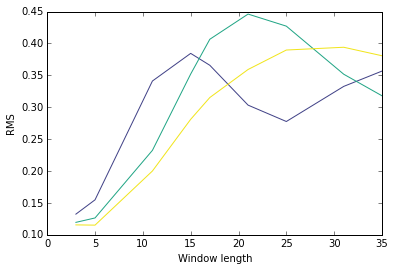

In [110]:
plt.plot(wl, values1, color = viridis_data[50,:])
plt.plot(wl, values2, color = viridis_data[150,:])
plt.plot(wl, values3, color = viridis_data[250,:])
plt.xlabel('Window length')
plt.ylabel('RMS')

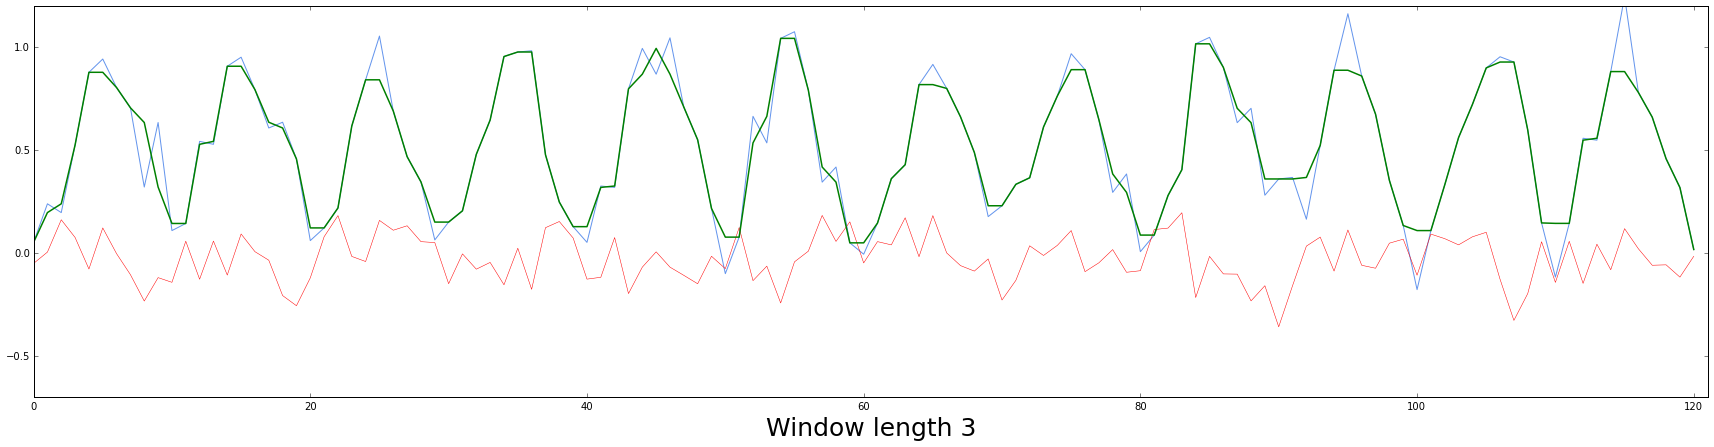

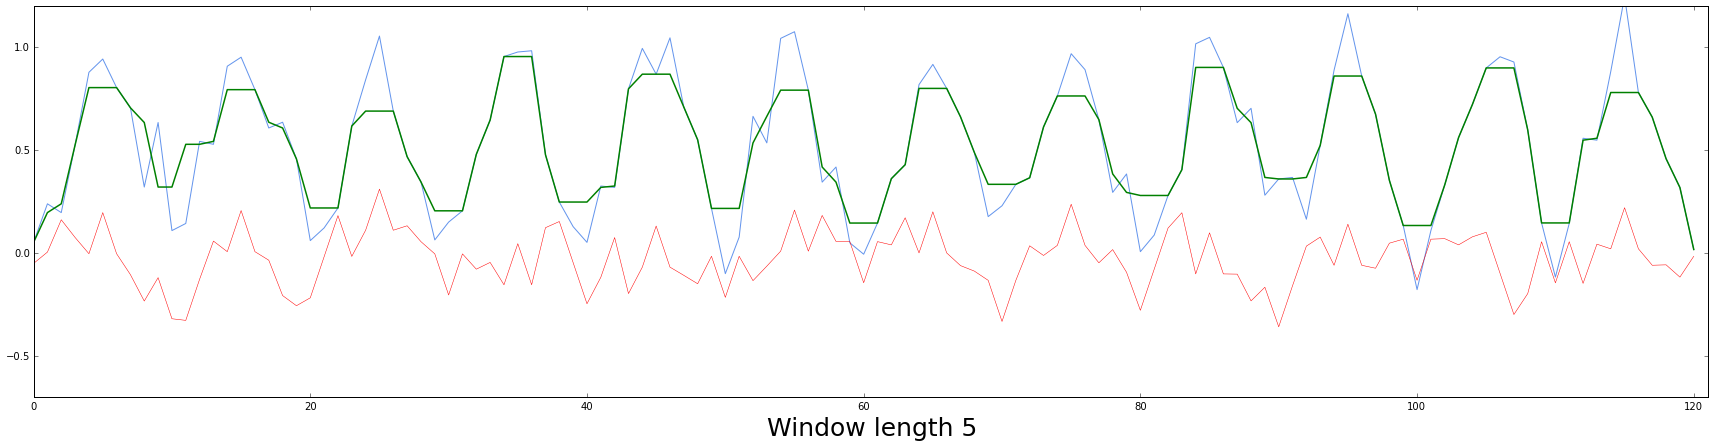

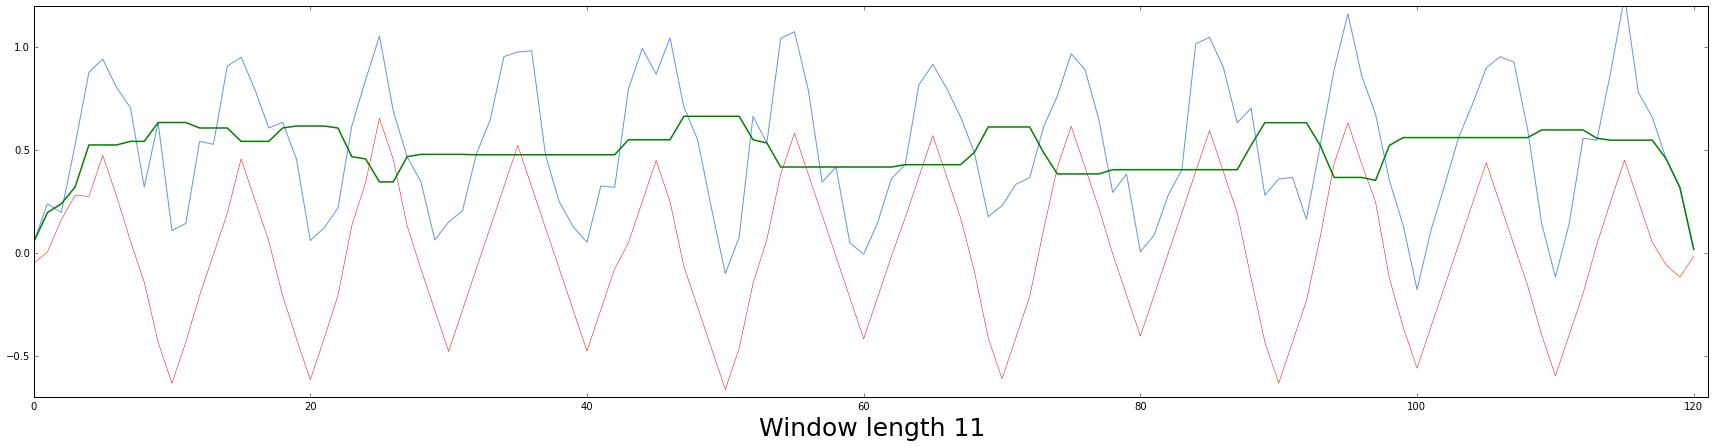

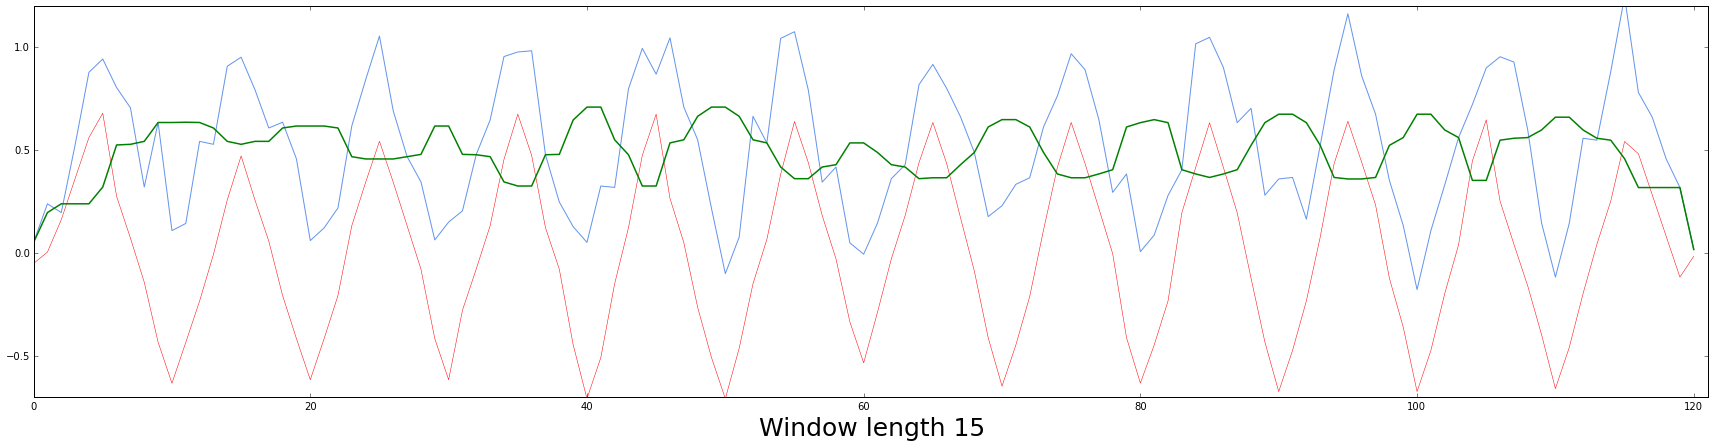

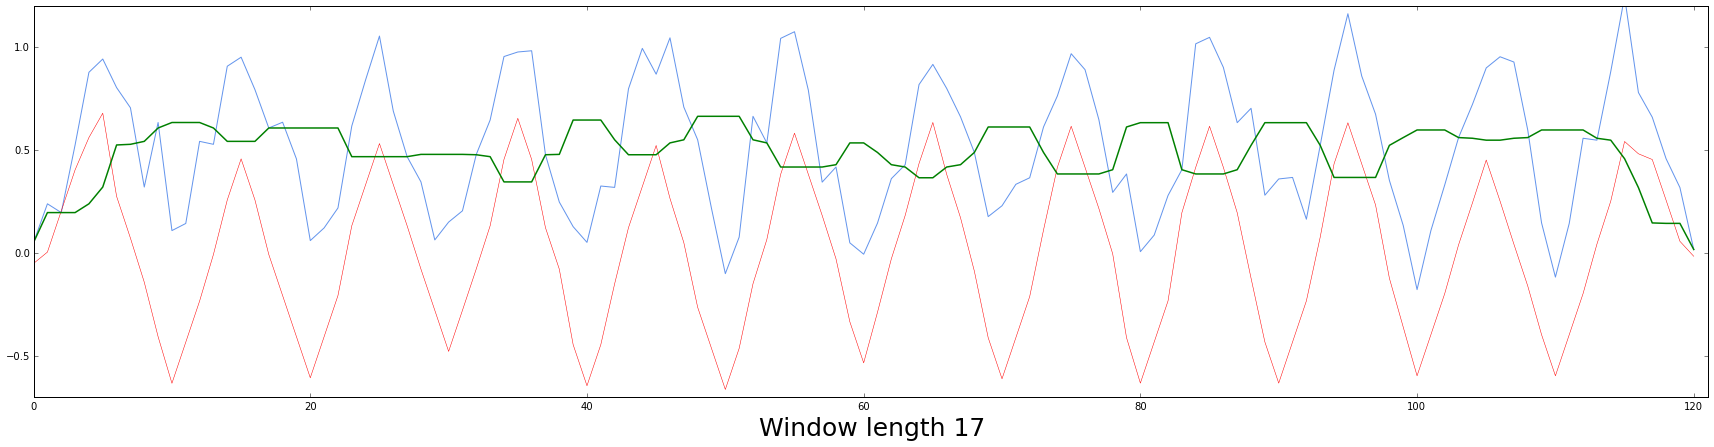

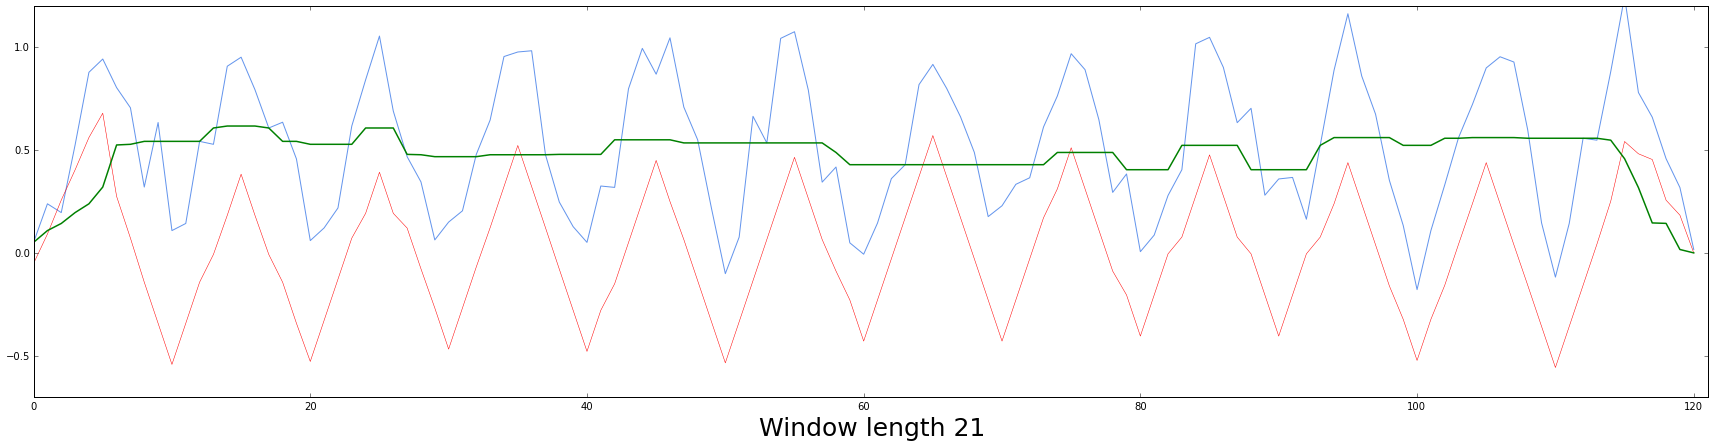

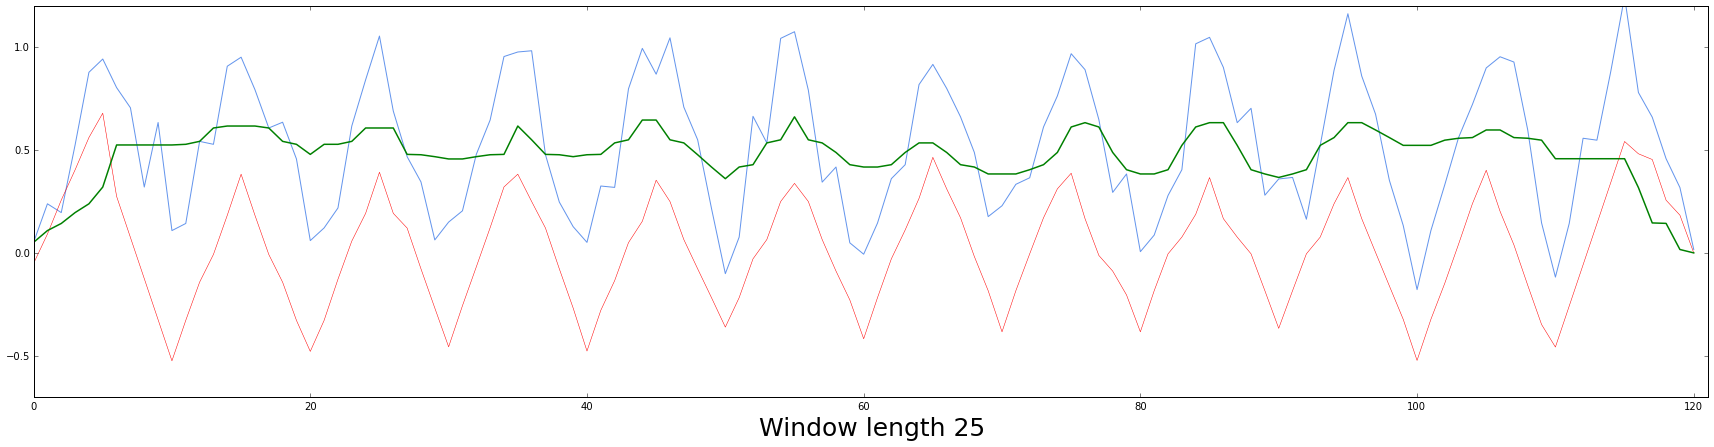

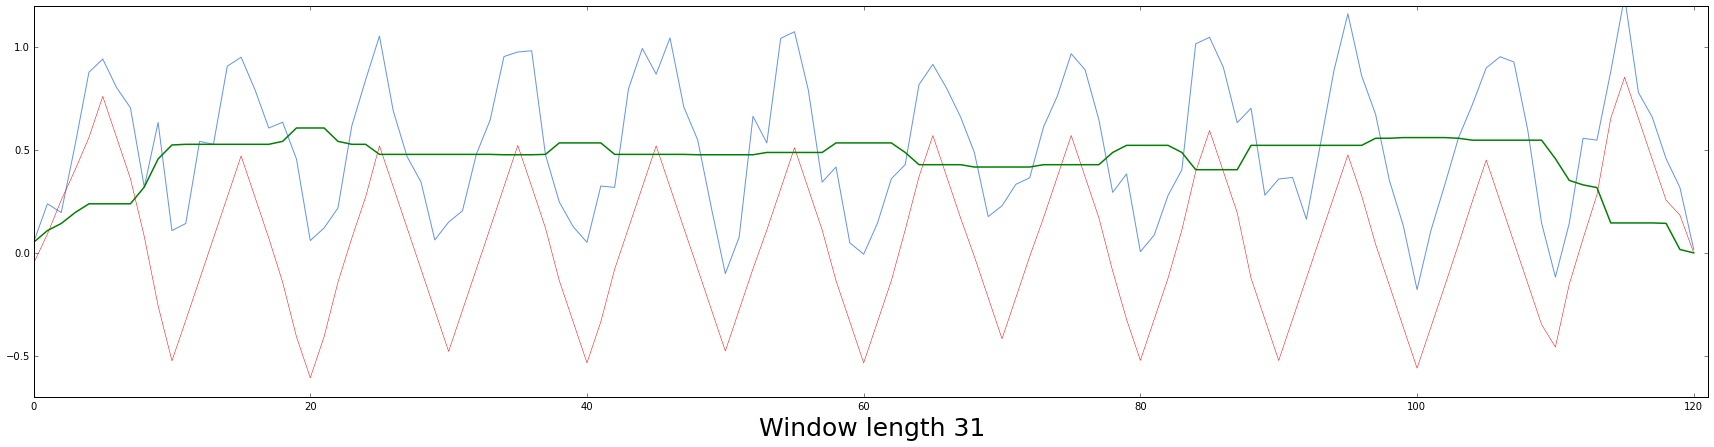

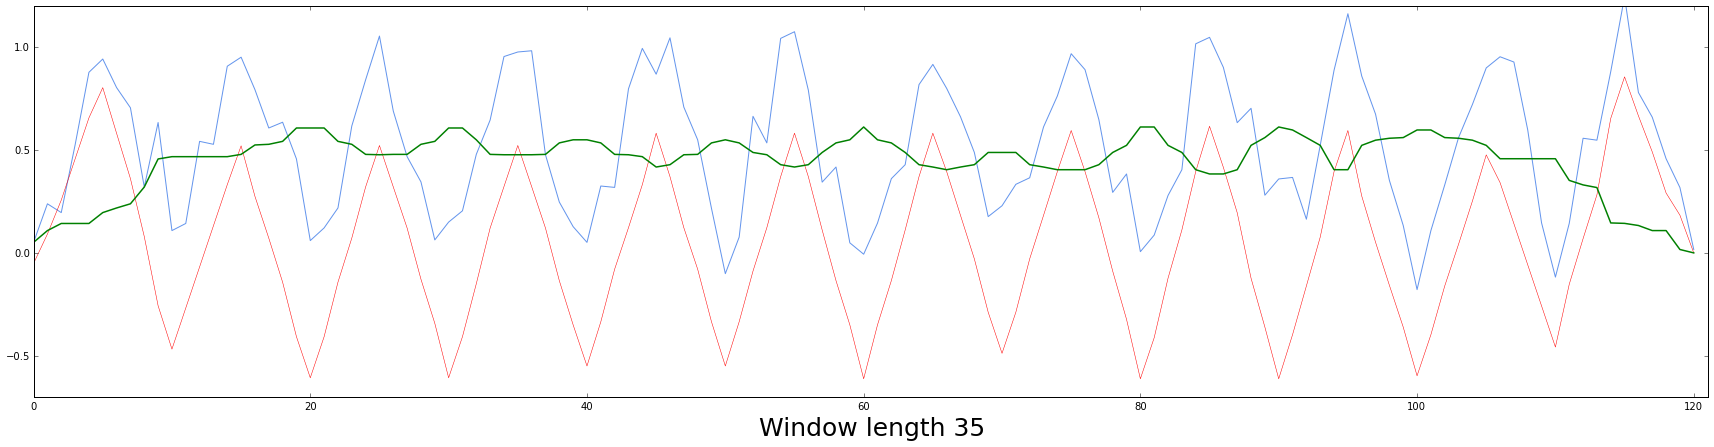

In [111]:
count = -1
for w in wl:
    count += 1
    fig = plt.figure(count, figsize=(30,7))
    plt.axis((0, len(data1) , -0.7, 1.2))
    plt.plot(data1_noised, color = 'cornflowerblue')
    filtered1[count,:] = medfilt(data1_noised, w)
    plt.plot(data1-filtered1[count,:], color = 'r', lw = 0.5)
    plt.plot(filtered1[count,:], color = 'g', lw = 1.5)
    plt.xlabel('Window length ' + str(w), fontsize=25)

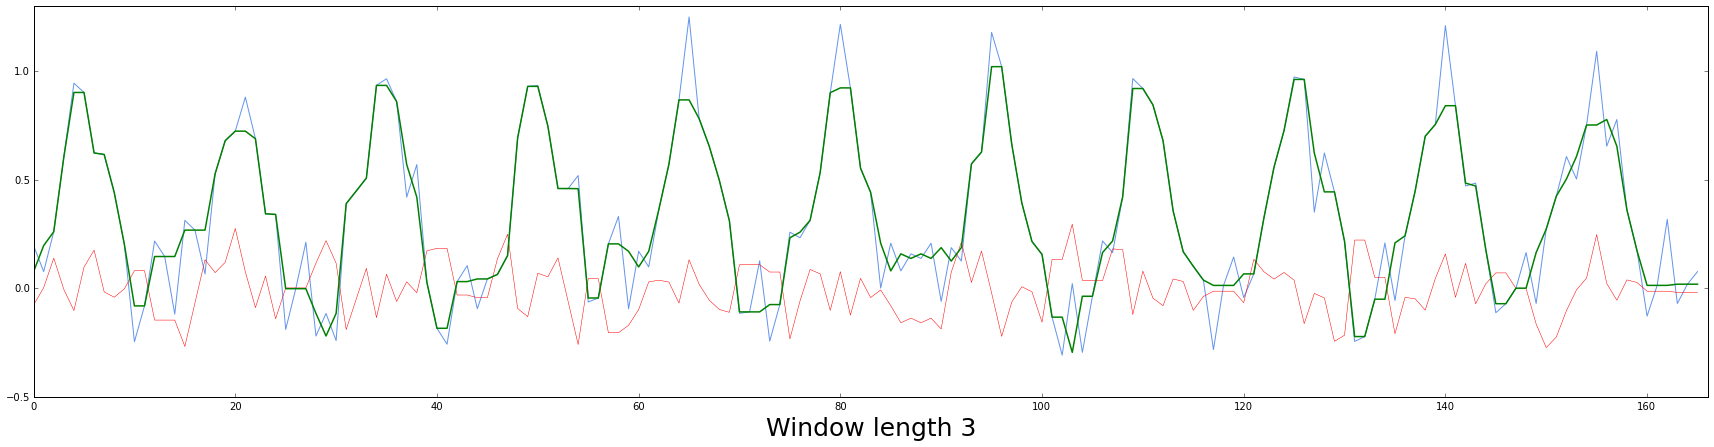

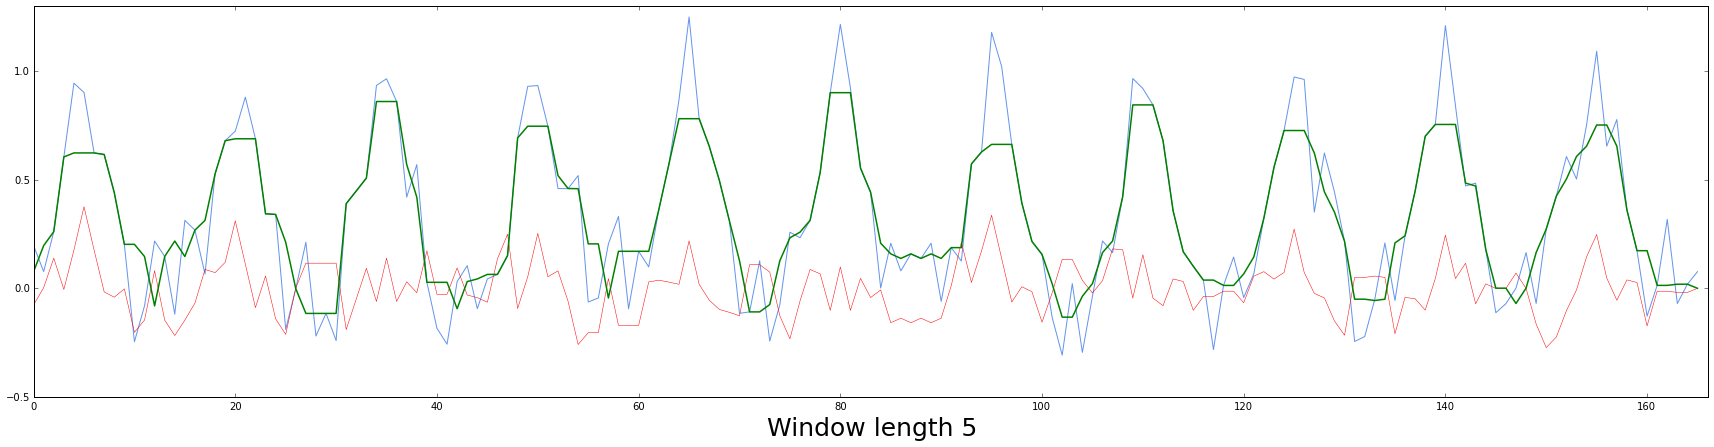

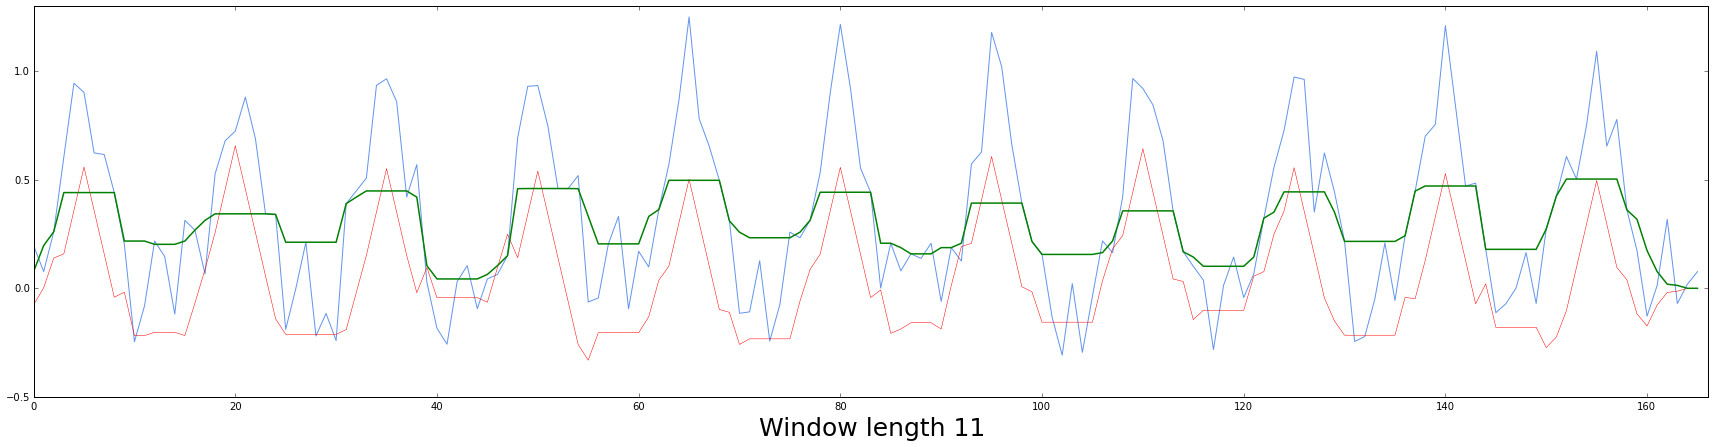

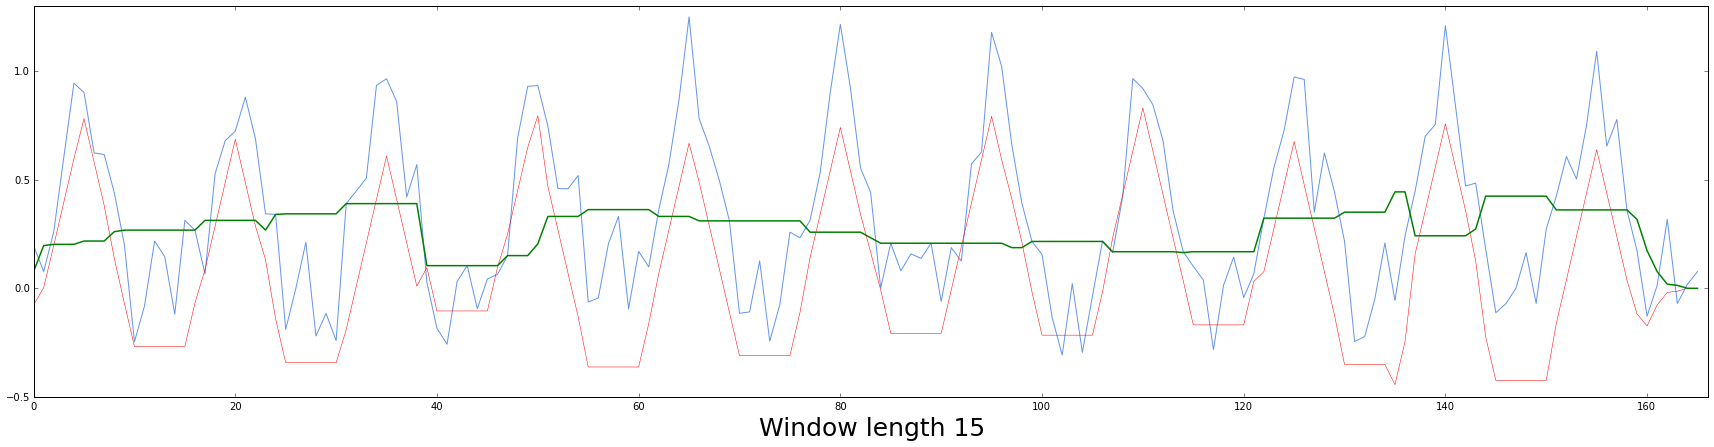

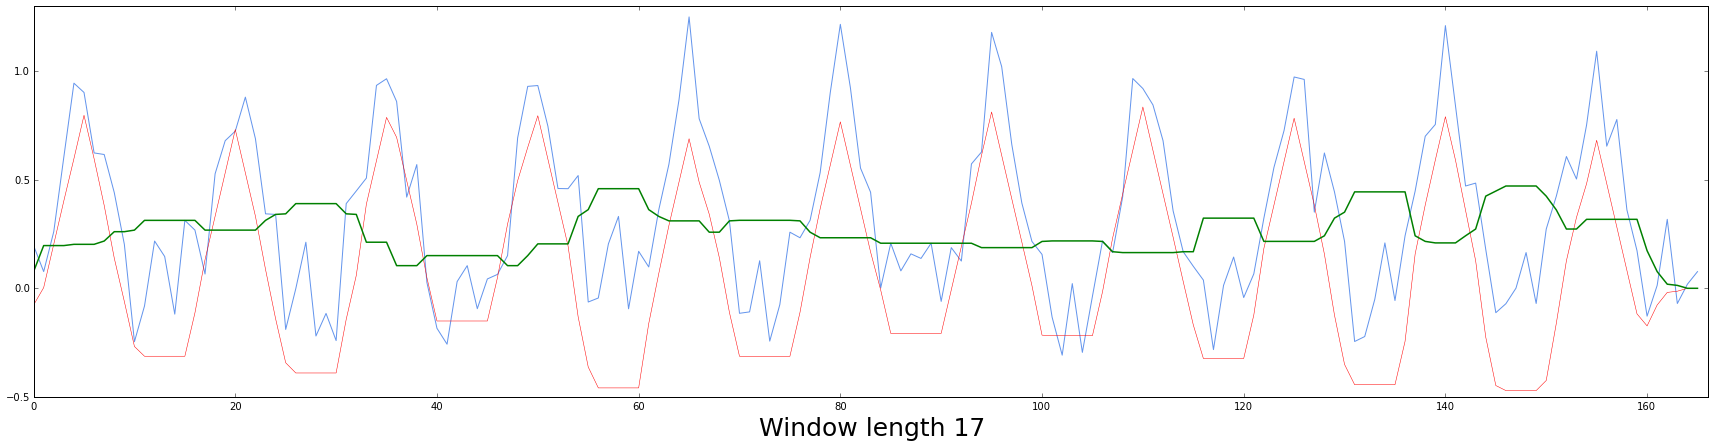

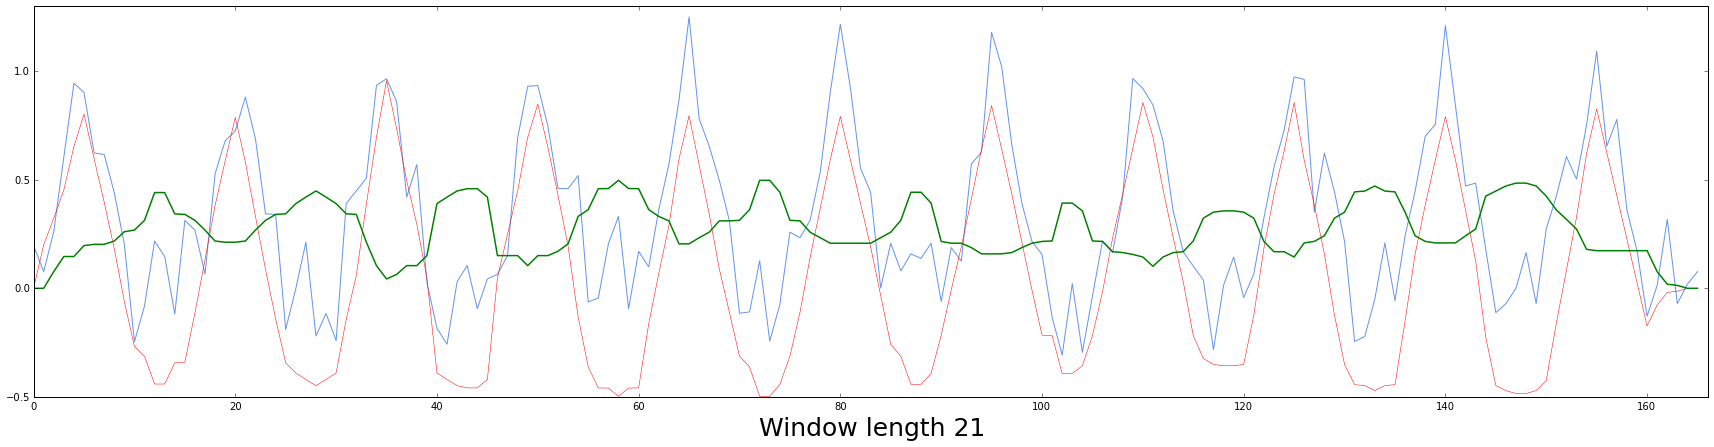

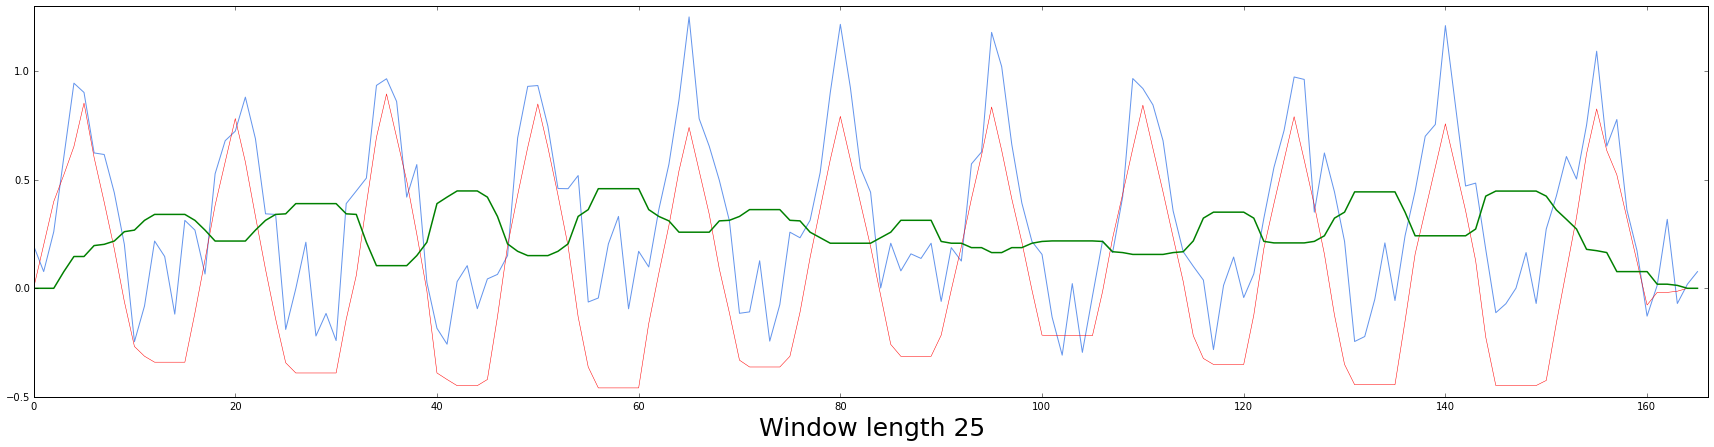

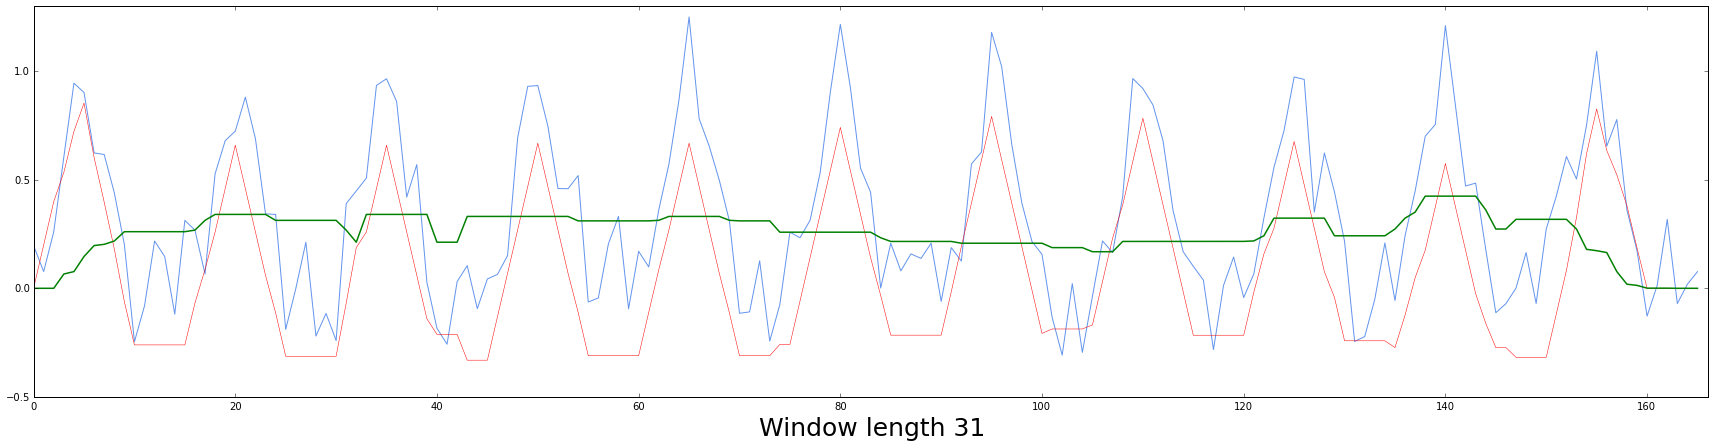

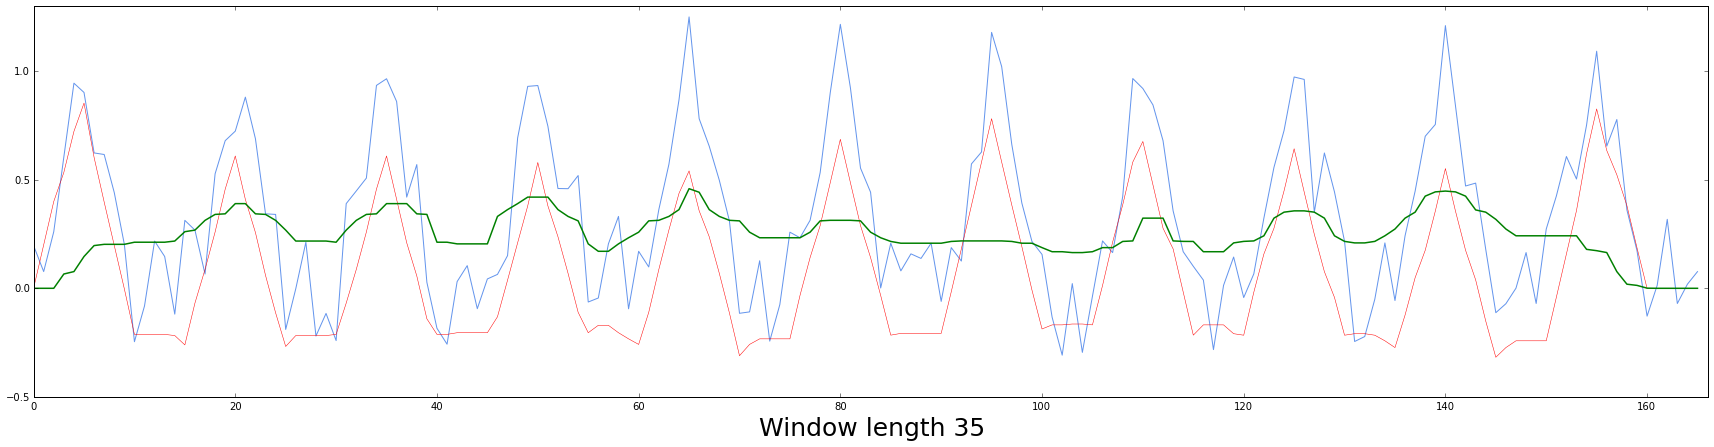

In [113]:
count = -1
for w in wl:
    count += 1
    fig = plt.figure(count, figsize=(30,7))
    plt.axis((0, len(data2), -0.5, 1.3))
    plt.plot(data2_noised, color = 'cornflowerblue')
    filtered2[count,:] = medfilt(data2_noised, w)
    plt.plot(data2-filtered2[count,:], color = 'r', lw = 0.5)
    plt.plot(filtered2[count,:], color = 'g', lw = 1.5)
    plt.xlabel('Window length ' + str(w), fontsize=25)

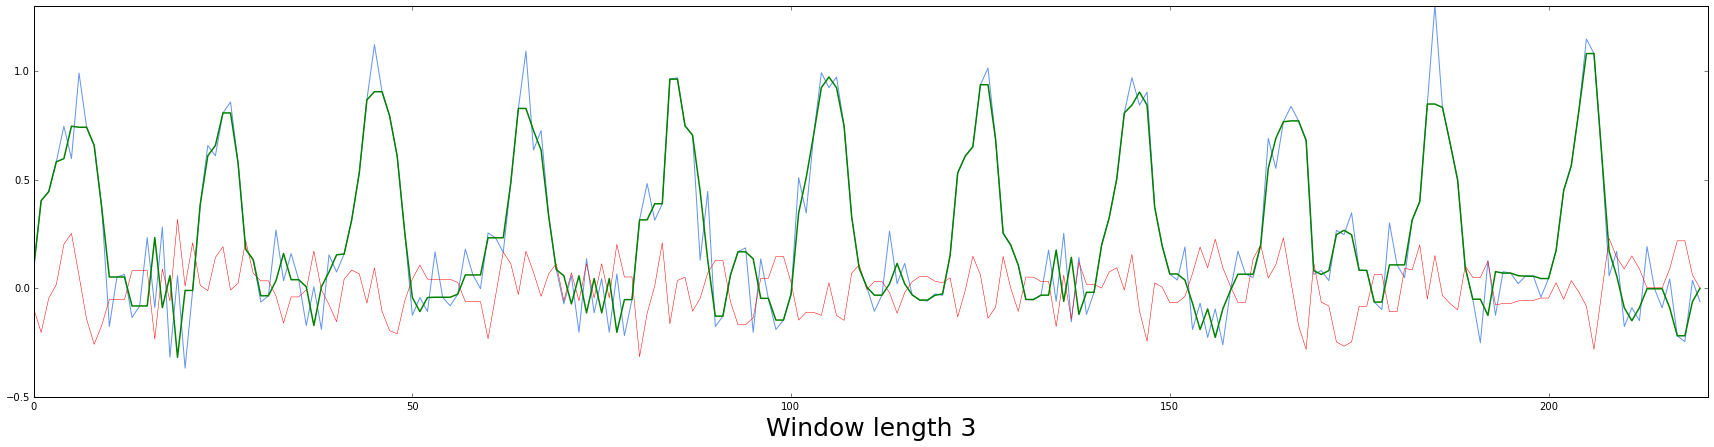

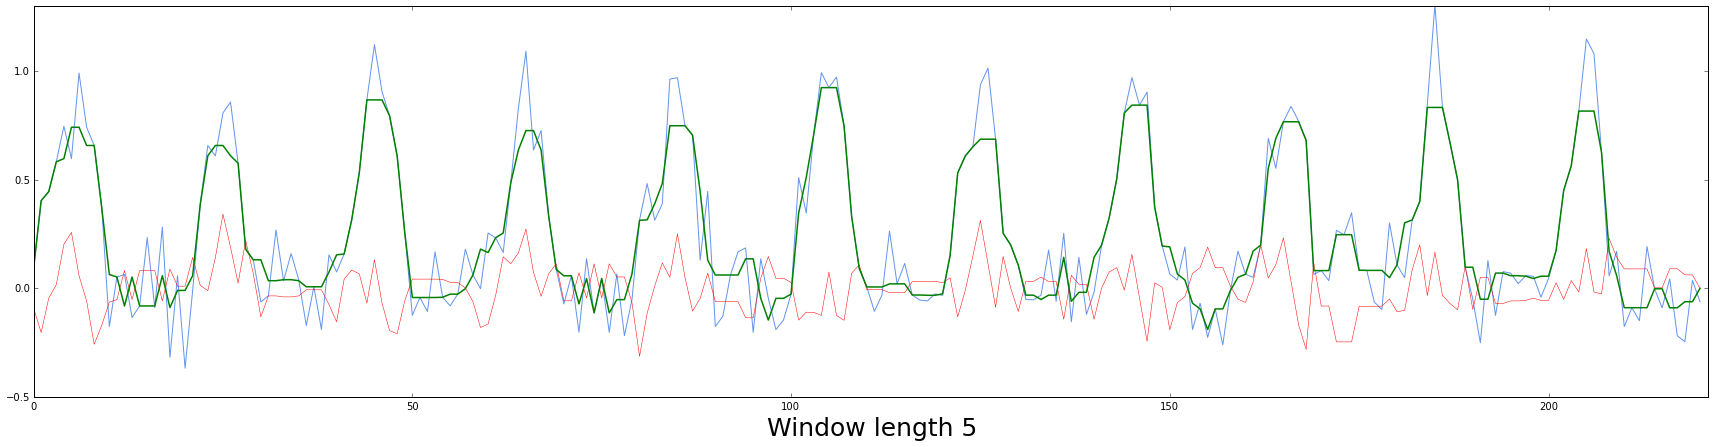

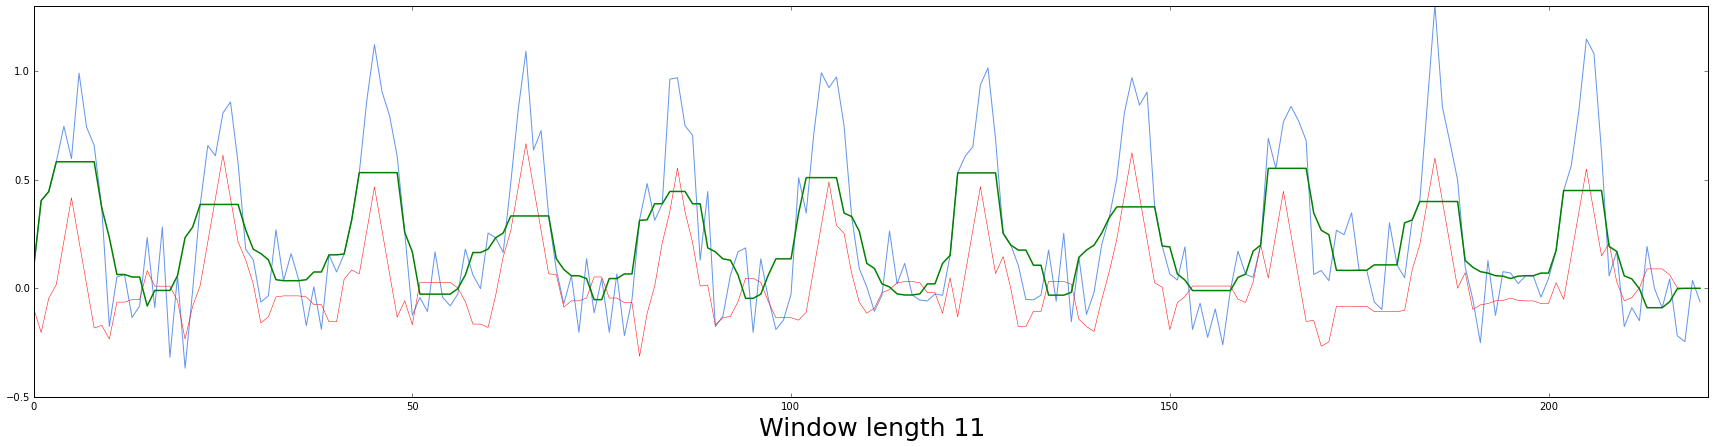

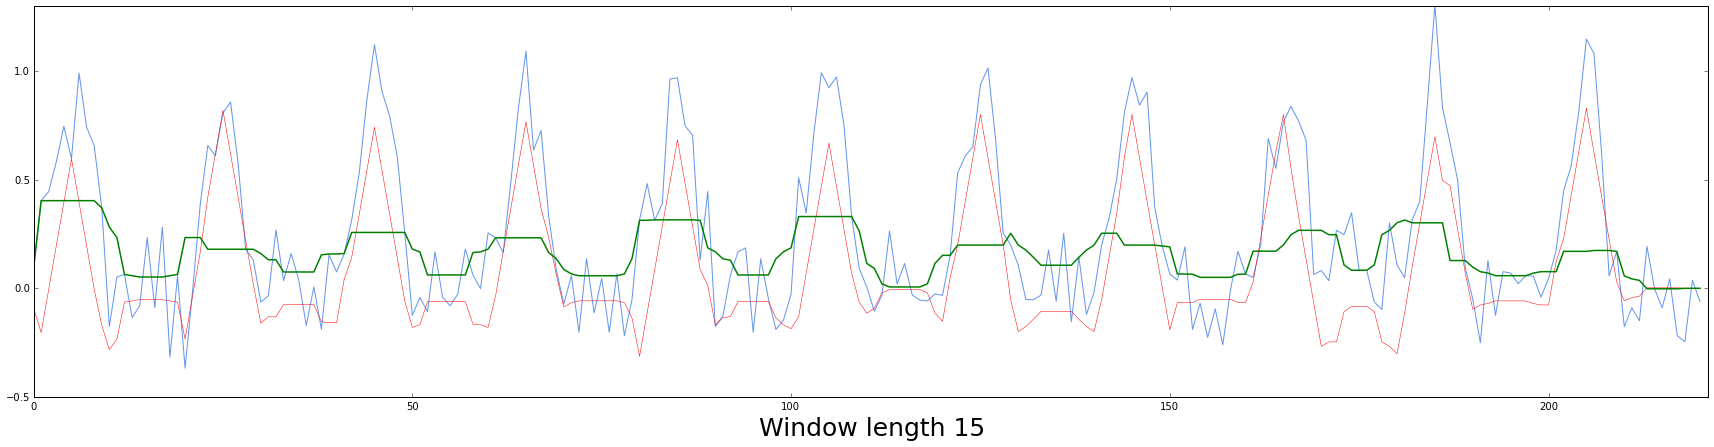

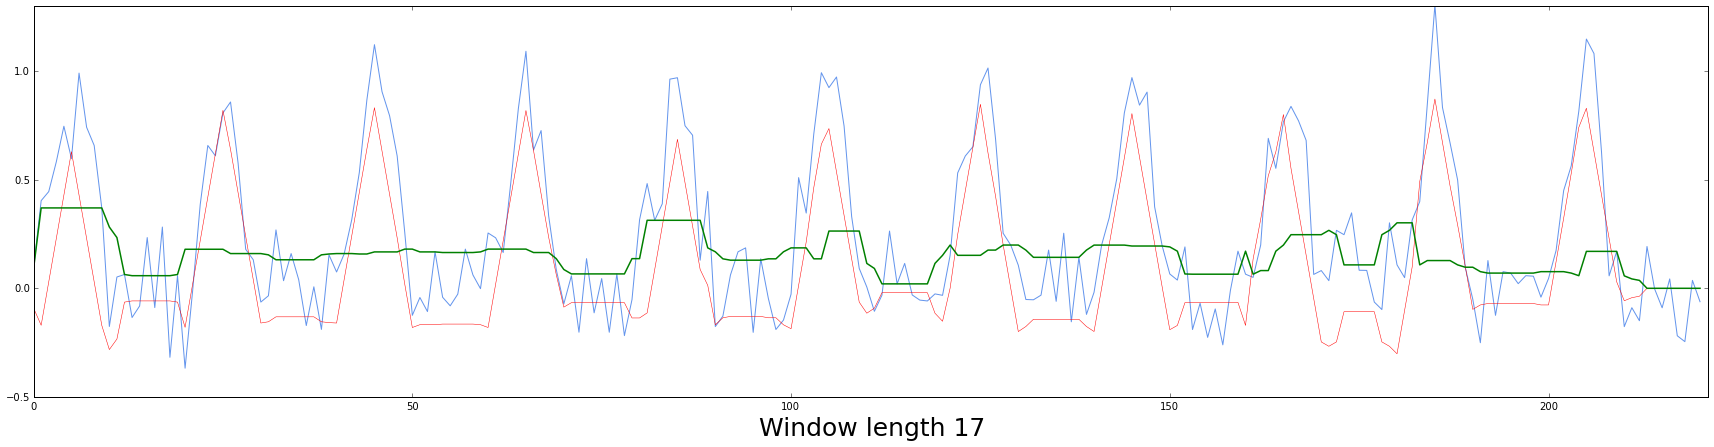

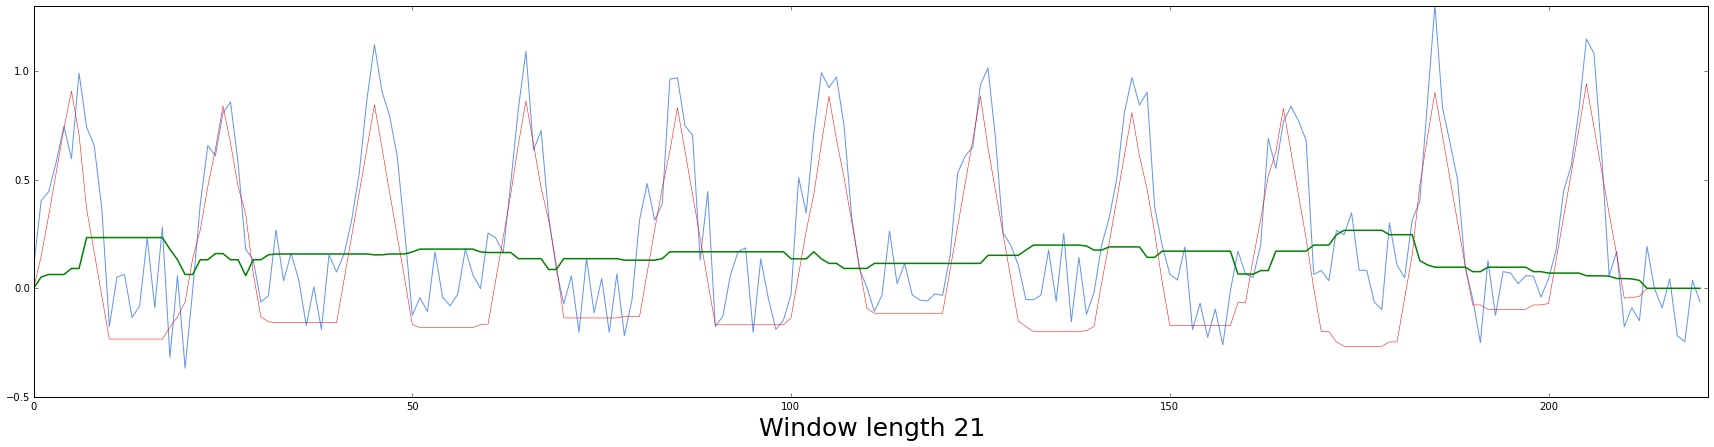

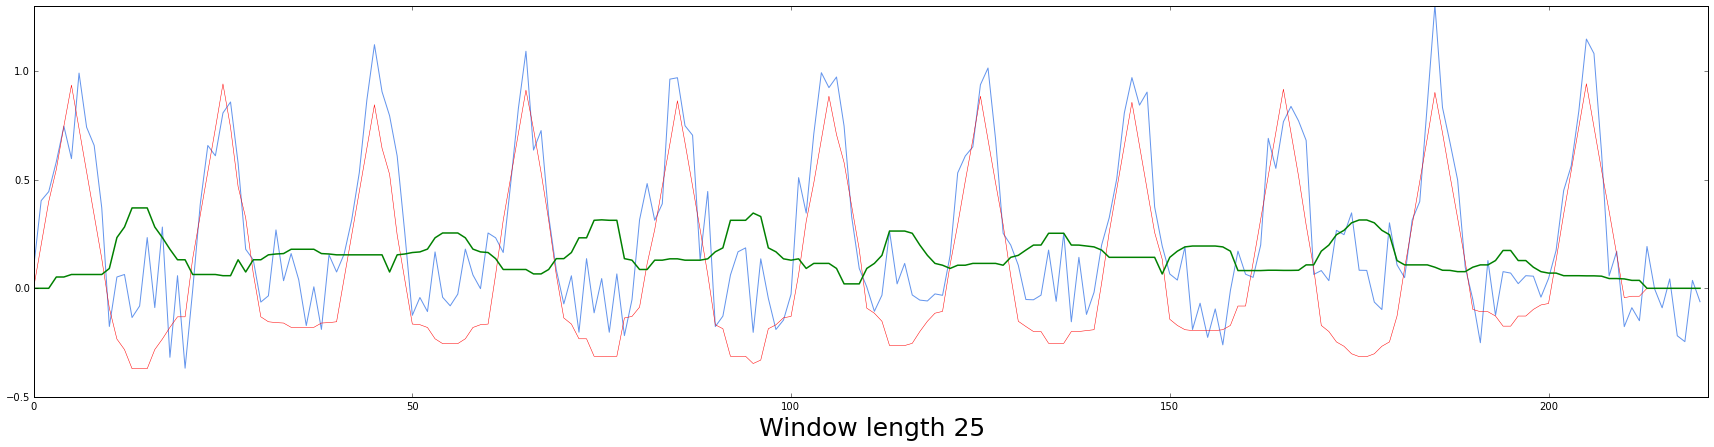

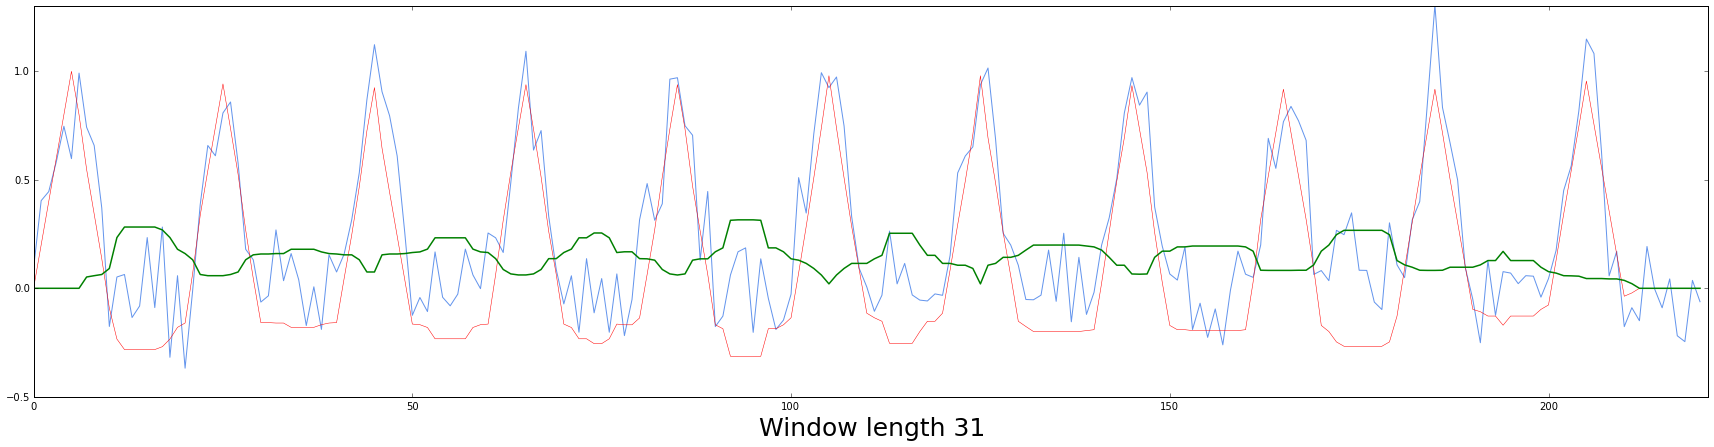

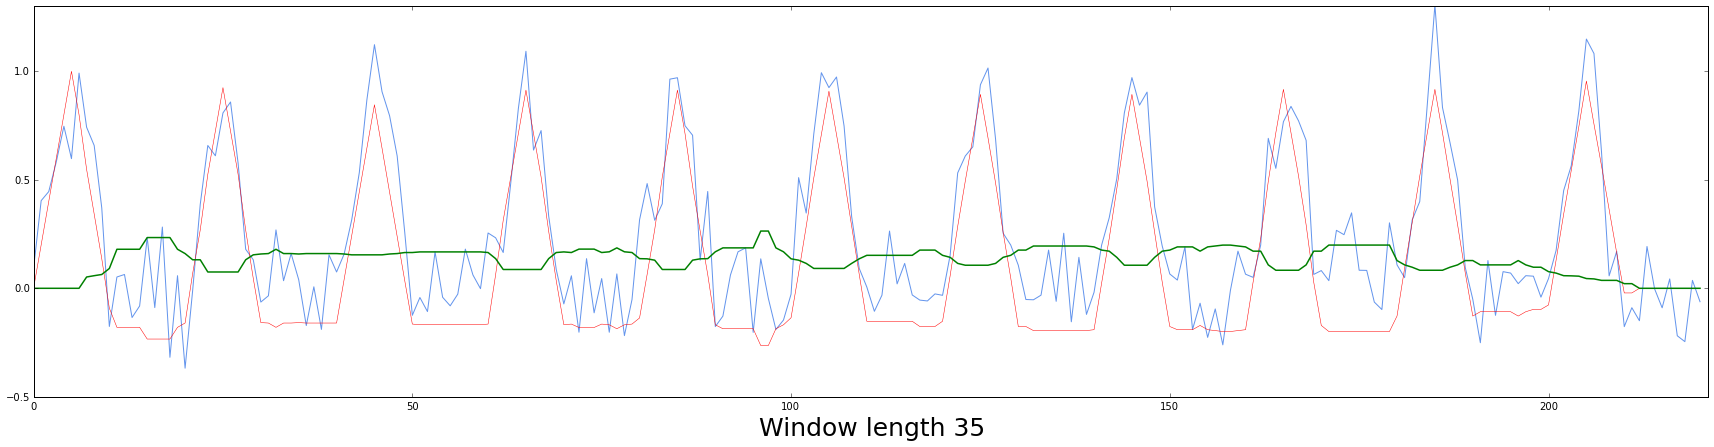

In [114]:
count = -1
for w in wl:
    count += 1
    fig = plt.figure(count, figsize=(30,7))
    plt.axis((0, len(data3), -0.5, 1.3))
    plt.plot(data3_noised, color = 'cornflowerblue')
    filtered3[count,:] = medfilt(data3_noised, w)
    plt.plot(data3-filtered3[count,:], color = 'r', lw = 0.5)
    plt.plot(filtered3[count,:], color = 'g', lw = 1.5)
    plt.xlabel('Window length ' + str(w), fontsize=25)